In [1]:
import pandas as pd
import importlib.util
import os
import sys
import json
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

script_path = os.path.abspath(os.path.join(os.getcwd(), '..', '..', 'scripts', 'plotting_functions.py'))
# Load the module from the specified file
spec = importlib.util.spec_from_file_location("plotting_functions", script_path)
plotting_functions = importlib.util.module_from_spec(spec)
spec.loader.exec_module(plotting_functions)

# Now you can use the functions from the module
get_holos_results = plotting_functions.get_holos_results
get_pyholos_data = plotting_functions.get_pyholos_data

df_holos = pd.read_csv('../../data/outputs/result_comparison/holos_outputs.csv')
df_py = pd.read_csv('../../data/outputs/result_comparison/python_holos.csv')

potato_holos = get_holos_results(df_holos, 'Potatoes')
potato_holos.insert(0, 'Source', 'Holos Software')
potato_py = get_pyholos_data(df_py, 'Potatoes')
potato_py.insert(0, 'Source', 'PyHolos')
potato_comparison = pd.concat([potato_holos, potato_py], ignore_index=True)
potato_comparison = potato_comparison.round(2)

soybean_holos = get_holos_results(df_holos, 'Soybeans')
soybean_holos.insert(0, 'Source', 'Holos Software')
soybean_py = get_pyholos_data(df_py, 'Soybeans')
soybean_py.insert(0, 'Source', 'PyHolos')
soybean_comparison = pd.concat([soybean_holos, soybean_py], ignore_index=True)
soybean_comparison = soybean_comparison.round(2)

# Executive summary
In collaboration with LiteFarm, we developed PyHolos, a Python-based model designed to enhance greenhouse gas emissions calculations, specifically for nitrous oxide. PyHolos integrates seamlessly with the existing LiteFarm framework. It also incorporates external data sources and allows for user-defined parameter ranges, offering improvements over the original Holos model. This product not only provides farmers with emissions estimates for informed decision-making, but also assists researchers by facilitating uncertainty analysis for parameters and regions with significant data variability. While PyHolos is robust, the emission estimates have shown minor discrepancies compared to those of the original Holos software. We recommend ongoing communication with the Holos team for further improvement.

# Introduction
Climate change presents a major challenge for our planet, with agriculture significantly contributing to greenhouse gas (GHG) emissions through activities such as livestock farming, fertilizer application, and land management practices [@johnson2007agricultural]. Farmers are central to addressing this challenge, as their choices in crop selection and farming practices directly impact carbon emissions and the environmental footprint [@jantke2020agricultural]. Agricultural choices are influenced by immediate profits, long-term soil health, and the financial benefits of conservation and sustainability programs. Carbon credit, for example, offers farmers the opportunity to earn extra revenue by adopting practices that reduce carbon emissions [@barbato2023farmer]. However, farmers lack scientific support to balance financial losses from less profitable crops with gains from carbon credits.  

Addressing this gap, our partner, the LiteFarm team, leads the way in agricultural innovation. Comprising a diverse group of researchers and developers, they aim to empower farmers, researchers, and policymakers with data-driven tools to make sustainability tangible and actionable. They have developed an application that helps farmers manage daily operations, boosting their income while also encouraging environmentally friendly practices. Now, the team plans to enhance the app by integrating greenhouse gas (GHG) emissions calculations to further support sustainable farming decisions.  

Selecting a suitable GHG emissions calculation model is crucial for this task. The LiteFarm team chose the Holos model due to its open-source nature and its endorsement by the Canadian government for reliability [@Holos2022]. Unlike commercial models, Holos offers a reliable and free alternative. However, this model has limitations: it operates as a standalone tool and cannot be directly integrated with the LiteFarm framework. It runs exclusively on Windows OS and is developed in C#, restricting its wider usability. Moreover, its fixed parameters limit the model's flexibility and adaptability for incorporating data from new or alternative sources.  

Our project aims to integrate the Holos GHG emission calculation module into the LiteFarm framework, focusing on nitrous oxide ($N_2O$) emissions from crop residue. We enhance the existing Holos model to better align with our partner’s needs and goals. Our objectives are:  

(1) Model Reconstruction: We aim to rebuild the Holos model in Python for smoother integration with LiteFarm. This shift ensures better compatibility with the app’s existing framework and offers more accessibility and versatility than the original Holos software.

(2) Enhanced Flexibility: We aim to enhance the Holos model for parameter sampling from external data sources or user-defined distributions. This adjustment increases flexibility in model parameterization, adapting to diverse global agricultural environments. Including external data fits our partner’s global research scope and mitigates data scarcity in under-researched regions.

(3) Improved Reliability through Sensitivity Analysis: With the enhanced model, we conduct sensitivity analyses to understand how input variations affect GHG emission estimates. This process is vital for identifying and minimizing uncertainties, thereby helping our partner pinpoint research gaps and provide farmers with accurate, reliable data for informed decision-making.

# Data science methods  

## Model development: PyHolos  

We developed the PyHolos model to calculate nitrous oxide emissions from crop residues. After thoroughly reviewing the original Holos model code and technical reports, we identified 12 groups of equations and 24 parameters (Appendix @tbl-params). Our goal with PyHolos is to keep the core functions of the Holos model while tailoring it to better meet our partner's needs.  

### Model Reconstruction  

To replicate the original Holos outputs, we reconstructed the Holos model within PyHolos. The model consists of two key components: a Data Loader and a Calculator. Both components are broken down into smaller, manageable steps to enhance structure and functionality. The Data Loader imports parameter values organized into specific categories, while the Calculator processes these values in stages, allowing for intermediate result storage and accuracy validation against the original model outputs (@fig-structure-conceptual).  



![PyHolos Model Architecture. This diagram outlines the PyHolos workflow where the Data Loader retrieves predefined Holos parameters from CSV files or pulls in external data as required by users. Parameters are systematically categorized into five groups: farm, crop, crop-group, climate and soil, and modifiers. The Calculator component subsequently processes these parameters to perform calculations on crop residue, emission factors, and total N2O emissions.](../../img/PyHolos-structure-conceptual.svg){#fig-structure-conceptual}  

### Enhanced Flexibility  

While PyHolos uses Holos’s original fixed parameters for standard operations, we also enhanced its flexibility. We have added modules that retrieve external data, supporting advanced analytical methods such as bootstrapping and sampling (@fig-structure-conceptual).   

For climate parameters, we use API calls to access the National Aeronautics and Space Administration/Prediction of World Wide Energy Resources (NASA/POWER; http://power.larc.nasa.gov), and for soil data, we use the Harmonized World Soil Database [@nachtergaele2023harmonized]. These enhancements offer global coverage and refined data resolution, boosting the model’s accuracy and relevance.   

Additionally, we have introduced customizable modules for setting crop and modifier parameters. This flexibility allows users with domain knowledge to tailor these parameters to their research needs.


## Analysis  

### Validation of PyHolos Outputs  

To ensure PyHolos’ accuracy, we compared its outputs with the original Holos software using the same set of input parameters.   

### Sensitivity Analysis Using PyHolos  

We conducted a sensitivity analysis with real farm locations. Unlike the original Holos model, which uses average climate and soil parameters from broad regions known as ecodistricts, PyHolos samples point-specific data from each farm's corresponding ecodistrict. This approach assesses uncertainties associated with the Holos model and provides a detailed view of how environmental factors affect calculation. For other fixed variables in Holos where domain knowledge is lacking, we varied parameters by ±25% using a uniform distribution.   

We also tested the model’s robustness with a hypothetical dataset of 105 farms, each growing three different crop types. For each crop at each farm, we generated 100 samples for each parameter to assess how different parameters affect the model's outputs.


# Data product and results  

## Data product - PyHolos  

The PyHolos model uses predefined parameters to replicate original Holos outputs and incorporates user-defined variables along with external climate and soil data for greater flexibility (@fig-structure-simplified). It calculates direct $N_2O$ emissions from crop residue in two modes: Farmer Mode and Scientific Mode.   

The PyHolos program is operated via command line, allowing users to specify the desired mode—Farmer or Scientific—and configure simulations and other settings. This command-line operation facilitates smooth integration with the LifeFarm dashboard and supports batch processing, ideal for extensive data analysis in research scenarios. 


![PyHolos Model Structure Overview. This diagram details the PyHolos workflow, structured into distinct components and modules for efficient data handling and processing. The Data Loader (gray shaded area) retrieves predefined Holos parameters from CSV files or sources external data as needed. The Calculator (light-yellow shaded area), processes these parameters to calculate crop residue, emission factors, and total N2O emissions. The data loader manages farm, crop, climate, soil, and modifier parameters across five modules (blue boxes), which also access external climate and soil data and user-defined parameter distributions (purple boxes). Modules containing supporting classes and functions are indicated by green boxes. The module/class invoked by main.py, our main program script, is shown in salmon-colored boxes. Supporting scripts for defining parameter distribution and batch processing reside outside the main program folder `src/`, in a directory `scripts/` (yellow boxes). The main data flows and processes are depicted by thick gray-blue arrows, while black solid lines show module interactions, and black dashed lines indicate the use of farm data across modules.](../../img/PyHolos-structure-simplified.svg){#fig-structure-simplified}  


### Model reconstruction: Farmer Mode   

Farmer Mode delivers a single, definitive output, ideal for users needing straightforward estimates (e.g., real farmer users). When using default Holos parameters, this mode replicates the original Holos results with the same farm data inputs such as crop type, yield, area. The results are formatted in JSON as a simple dictionary.   

### Enhanced flexibility: Scientific Mode   

Scientific Mode runs simulations by sampling across parameter distributions, generating multiple outputs per parameter. This mode is suitable for users conducting in-depth analyses. Results are formatted in JSON as nested dictionaries to accommodate multiple simulation results per parameter.   

A key application of this mode is predicting and understanding emissions extremes and trends. For instance, the integrated external climate data source captures real-time changes, enabling temporal analyses that track emissions trends over time. 


## Results

### PyHolos model validation

Our comparison of results between PyHolos and Holos software utilized Holos' ability to export values for intermediate and emission variables, allowing for a thorough review. However, Holos does not export emission factor values, and it inaccurately reports carbon in product (C_p) as zero for non-root crops, complicating direct comparisons. For root crops, the results are similar with consistent values for above and below ground carbon input, but differences in nitrogen from crop residue and direct N2O emissions were noted. The annual crop group showed larger variances in carbon inputs and N2O emissions, highlighting inconsistencies across different crop types.

In [2]:
html_table_1 = potato_comparison.to_html(index=False)
caption = '<caption><strong>Table 1:</strong> Result Comparison for Root Crop. This table compares results for root crops between PyHolos and Holos software. Both models report identical values for above and below ground carbon input, but show minor differences in nitrogen from crop residue and direct N2O emissions.</caption>'
html_table_1_with_caption = f'{html_table_1}{caption}'

HTML(html_table_1_with_caption)

Source,Crop,Yield,Aboveground Carbon Input,Belowground Carbon Input,N2O-N From Crop Residues,N2O Direct CO2e
Holos Software,Potatoes,10000,365.32,15.28,0.90,521.08
Holos Software,Potatoes,30000,1095.96,45.86,2.70,1293.98
Holos Software,Potatoes,50000,1826.60,76.43,4.50,2066.88
PyHolos,Potatoes,10000,365.32,15.29,0.83,354.47
PyHolos,Potatoes,30000,1095.96,45.86,2.48,1063.40
PyHolos,Potatoes,50000,1826.60,76.43,4.13,1772.34


In [3]:
print('')

In [4]:
html_table_2 = potato_comparison.to_html(index=False)
caption = '<caption><strong>Table 2:</strong> Result Comparison for Annual Crop. This table details the discrepancies in results for annual crops between PyHolos and Holos software. It highlights more significant differences across all intermediate variables and final emission values compared to root crops.</caption>'
html_table_2_with_caption = f'{html_table_1}{caption}'

HTML(html_table_2_with_caption)

Source,Crop,Yield,Aboveground Carbon Input,Belowground Carbon Input,N2O-N From Crop Residues,N2O Direct CO2e
Holos Software,Potatoes,10000,365.32,15.28,0.90,521.08
Holos Software,Potatoes,30000,1095.96,45.86,2.70,1293.98
Holos Software,Potatoes,50000,1826.60,76.43,4.50,2066.88
PyHolos,Potatoes,10000,365.32,15.29,0.83,354.47
PyHolos,Potatoes,30000,1095.96,45.86,2.48,1063.40
PyHolos,Potatoes,50000,1826.60,76.43,4.13,1772.34


In [5]:
print('')

We identified some potential causes for the discrepancies between PyHolos and Holos software, acknowledging that not all sources of error are clear. In cases such as the root-crop group, differences in nitrogen from crop residue suggest potential modifications in how farm area data is used, which are not clearly documented. The algorithm document suggests a linear relationship between crop yield and N2O emissions, but this is not consistently evident in Holos outputs, hinting at outdated or misaligned documentation. The discrepancies are more pronounced in the annual crop group compared to root crops, indicating a potential variation in how algorithms are applied across different crop types. Continuous updates and ongoing developments in Holos software, which might not always align with the documentation, could contribute to these inconsistencies.

![Emission Estimates for Soybean across Different Yields. This figure illustrates the emission estimates for soybeans at varying yields. According to the algorithm document, emissions should correlate linearly with crop yields, as demonstrated by PyHolos results. However, Holos software results do not exhibit this linear relationship, indicating potential issues with outdated or misaligned documentation.
](../../img/emission_comparison_soybean.png){#fig-structure-simplified}  

### Sensitivity Analysis Results

In [6]:
scripts_path = os.path.abspath(os.path.join(os.getcwd(), '../../scripts'))
if scripts_path not in sys.path:
    sys.path.append(scripts_path)
from plotting_functions import plot_boxplot
from plotting_functions import plot_by_province
from plotting_functions import plot_by_eco_id
from plotting_functions import plot_by_crop
file_path = '../../data/outputs/farm_100_run_sci_mode.json'
with open(file_path, 'r') as file:
    json_data = json.load(file)

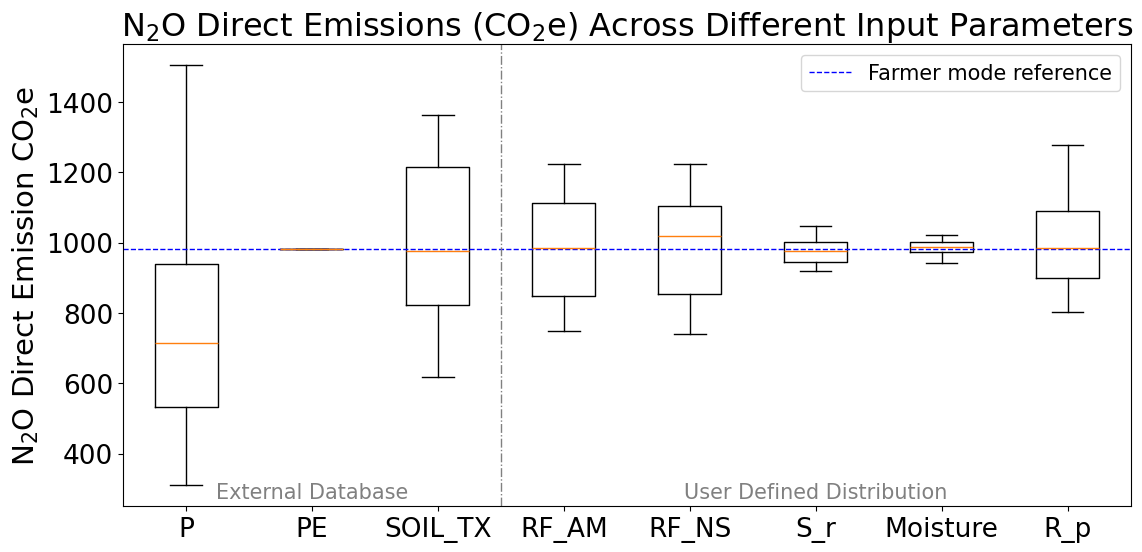

In [7]:
#| label: sensitivity_analysis_plot
#| fig-cap: "Figure 4. N₂O Direct Emissions (CO₂e) across different input parameters. The blue dashed line represents the baseline emission value from the farmer mode.Parameters from external databases (P, PE, SOIL_TX) are separated by a vertical dashed line from those with user-defined distributions (RF_AM, RF_NS, S_r, Moisture, R_p)." 

plot_boxplot(json_data)

Each boxplot shows the variability induced by one parameter, holding others constant. For user-defined distributions parameters, they are set as uniform distribution with ±25% uncertainty in default. The boxplots show that the farmer mode results generally align with the median values, indicating accurate central estimates. The variability is high for some parameters and low for others due to differences in how sensitive N₂O emissions are to changes in these parameters. For external database parameters, the farmer mode might overestimate or underestimate the emission, underscoring the need to consider local conditions and data variability. The farmer mode uses the average for the entire ecodistrict, but some parameters can be highly variable across the ecodistrict. By randomly sampling across the ecodistrict, we can capture this variability, providing a more accurate representation of potential emissions for farms in the same ecodistrict.

## Advantages and limitations

The advantages of Farmer Mode are its ease of integration with existing LiteFarm infrastructure and the fact it is platform agnostic unlike the Windows-dependent Holos software. PyHolos allows for straightforward comparisons with Holos software estimates because it borrows parameters directly from Holos software. However, PyHolos is limited to estimating only N2O emissions and omits other sources such as fertilizers and purchased energy, potentially narrowing the utility for economic decision-making based on comprehensive emission data.

Scientific Mode supports detailed analyses by incorporating external data and user-defined parameters Scientific Mode demands domain expertise, which may restrict its use to individuals or settings with adequate resources and technical knowledge.
PyHolos is well-documented and detailed in its methodology and usage. It does not include modules to directly retrieve farm data from the Litefarm database, however, the modular approach to PyHolos development means that this functionality can be added easily in the future.

# Conclusions and recommendations

Holos, primarily a Windows GUI-based software, poses integration challenges with the LiteFarm platform and is less effective with large datasets and detailed scientific analysis.

To address LiteFarm's needs, we refined the greenhouse gas emissions modeling framework, enhancing nitrous oxide emissions calculations and introducing robust sensitivity analysis. Our solution, PyHolos, provides both emission estimates for individual farms and sensitivity analyses for various input parameters, significantly improving environmental assessment capabilities.

While minor discrepancies between PyHolos and the evolving Holos software exist, likely due to ongoing updates in Holos, these can be addressed through continuous collaboration with the Holos development team. Additionally, integrating LiteFarm’s database with PyHolos and optimizing data flow into the platform’s dashboard will further enhance performance and user experience.

# References

::: {#refs}
:::

# Appendix 

::: {.appendix}
:::

|Parameters|Explanation|Type|Data source|
|---|---|---|---|
| Farm | A unique identifier, each represents a specific farm | Farm-specific | LiteFarm |
| Crop common name | Text, common names of the crop grown by the farm, e.g., soybeans, wheat, and etc. | Farm-specific | LiteFarm |
| Total area (ha) | Numerical, total area of the farm | Farm-specific | LiteFarm |
| Estimated yield (kg / ha) | Numerical, the estimated yield | Farm-specific | LiteFarm |
| Lifecycle | Binary, perennial or annual | Farm-specific | LiteFarm |
| Province | Required by existing Holos framework | Farm-specific | Team extracted |
| Moisture (%) | Moisture content of product | Crop-related | Holos default/External information |
| N_p | N concentration in the product (kg kg-1) | Crop-related | Holos default/External information |
| N_s | N concentration in the straw (kg kg-1) | Crop-related | Holos default/External information |
| R_s | Relative biomass allocation coefficient for straw | Crop-related | Holos default/External information |
| R_p | Relative biomass allocation coefficient for product | Crop-related | Holos default/External information |
| N_r | N concentration in the roots (kg kg-1) | Crop-related | Holos default/External information |
| N_e | N concentration in the extra root material (kg kg-1) (until known from literature, the same N concentration used for roots will be utilized) | Crop-related | Holos default/External information |
| R_r | Relative biomass allocation coefficient for roots | Crop-related | Holos default/External information |
| R_e | Relative biomass allocation coefficient for extra-root material	 | Crop-related | Holos default/External information |
| RF_CS | Reduction factor for Cropping System | Crop-related | Holos default/External information |
| RF_NS | N source modifier RF_NSk (SN = Synthetic Nitrogen; ON = Organic Nitrogen; CRN = Crop Residue Nitrogen) | Crop-related | Holos default/External information |
| RF_AM | Reduction factor based on application method, only applicable to calculations of EF specific for SN | Crop-related | Holos default/External information |
| P_i | Annual growing season precipitation (May – October), in ecodistrict “i” (mm) | Climate-related | Holos default/External information |
| PE | Growing season potential evapotranspiration, by ecodistrict (May – October) | Climate-related | Holos default/External information |
| FR_Topo | FR_topo_i: Fraction of land occupied by lower portions of landscape | Soil-related | Holos default/External information |
| RF_TX | RF_TX i/j/i,j weighted modifier which provides a correction of the EF_Topo in ecodistrict ‘‘i’’ based on the soil texture | Soil-related | Holos default/External information |
| RF_till | Tillage modifier RF_Till (Conservation or Conventional Tillage) | Soil-crop-related | Holos default/External information |

: Input requirements for Holos GHG model {#tbl-params .striped}

{{< include equations.md >}}

## 

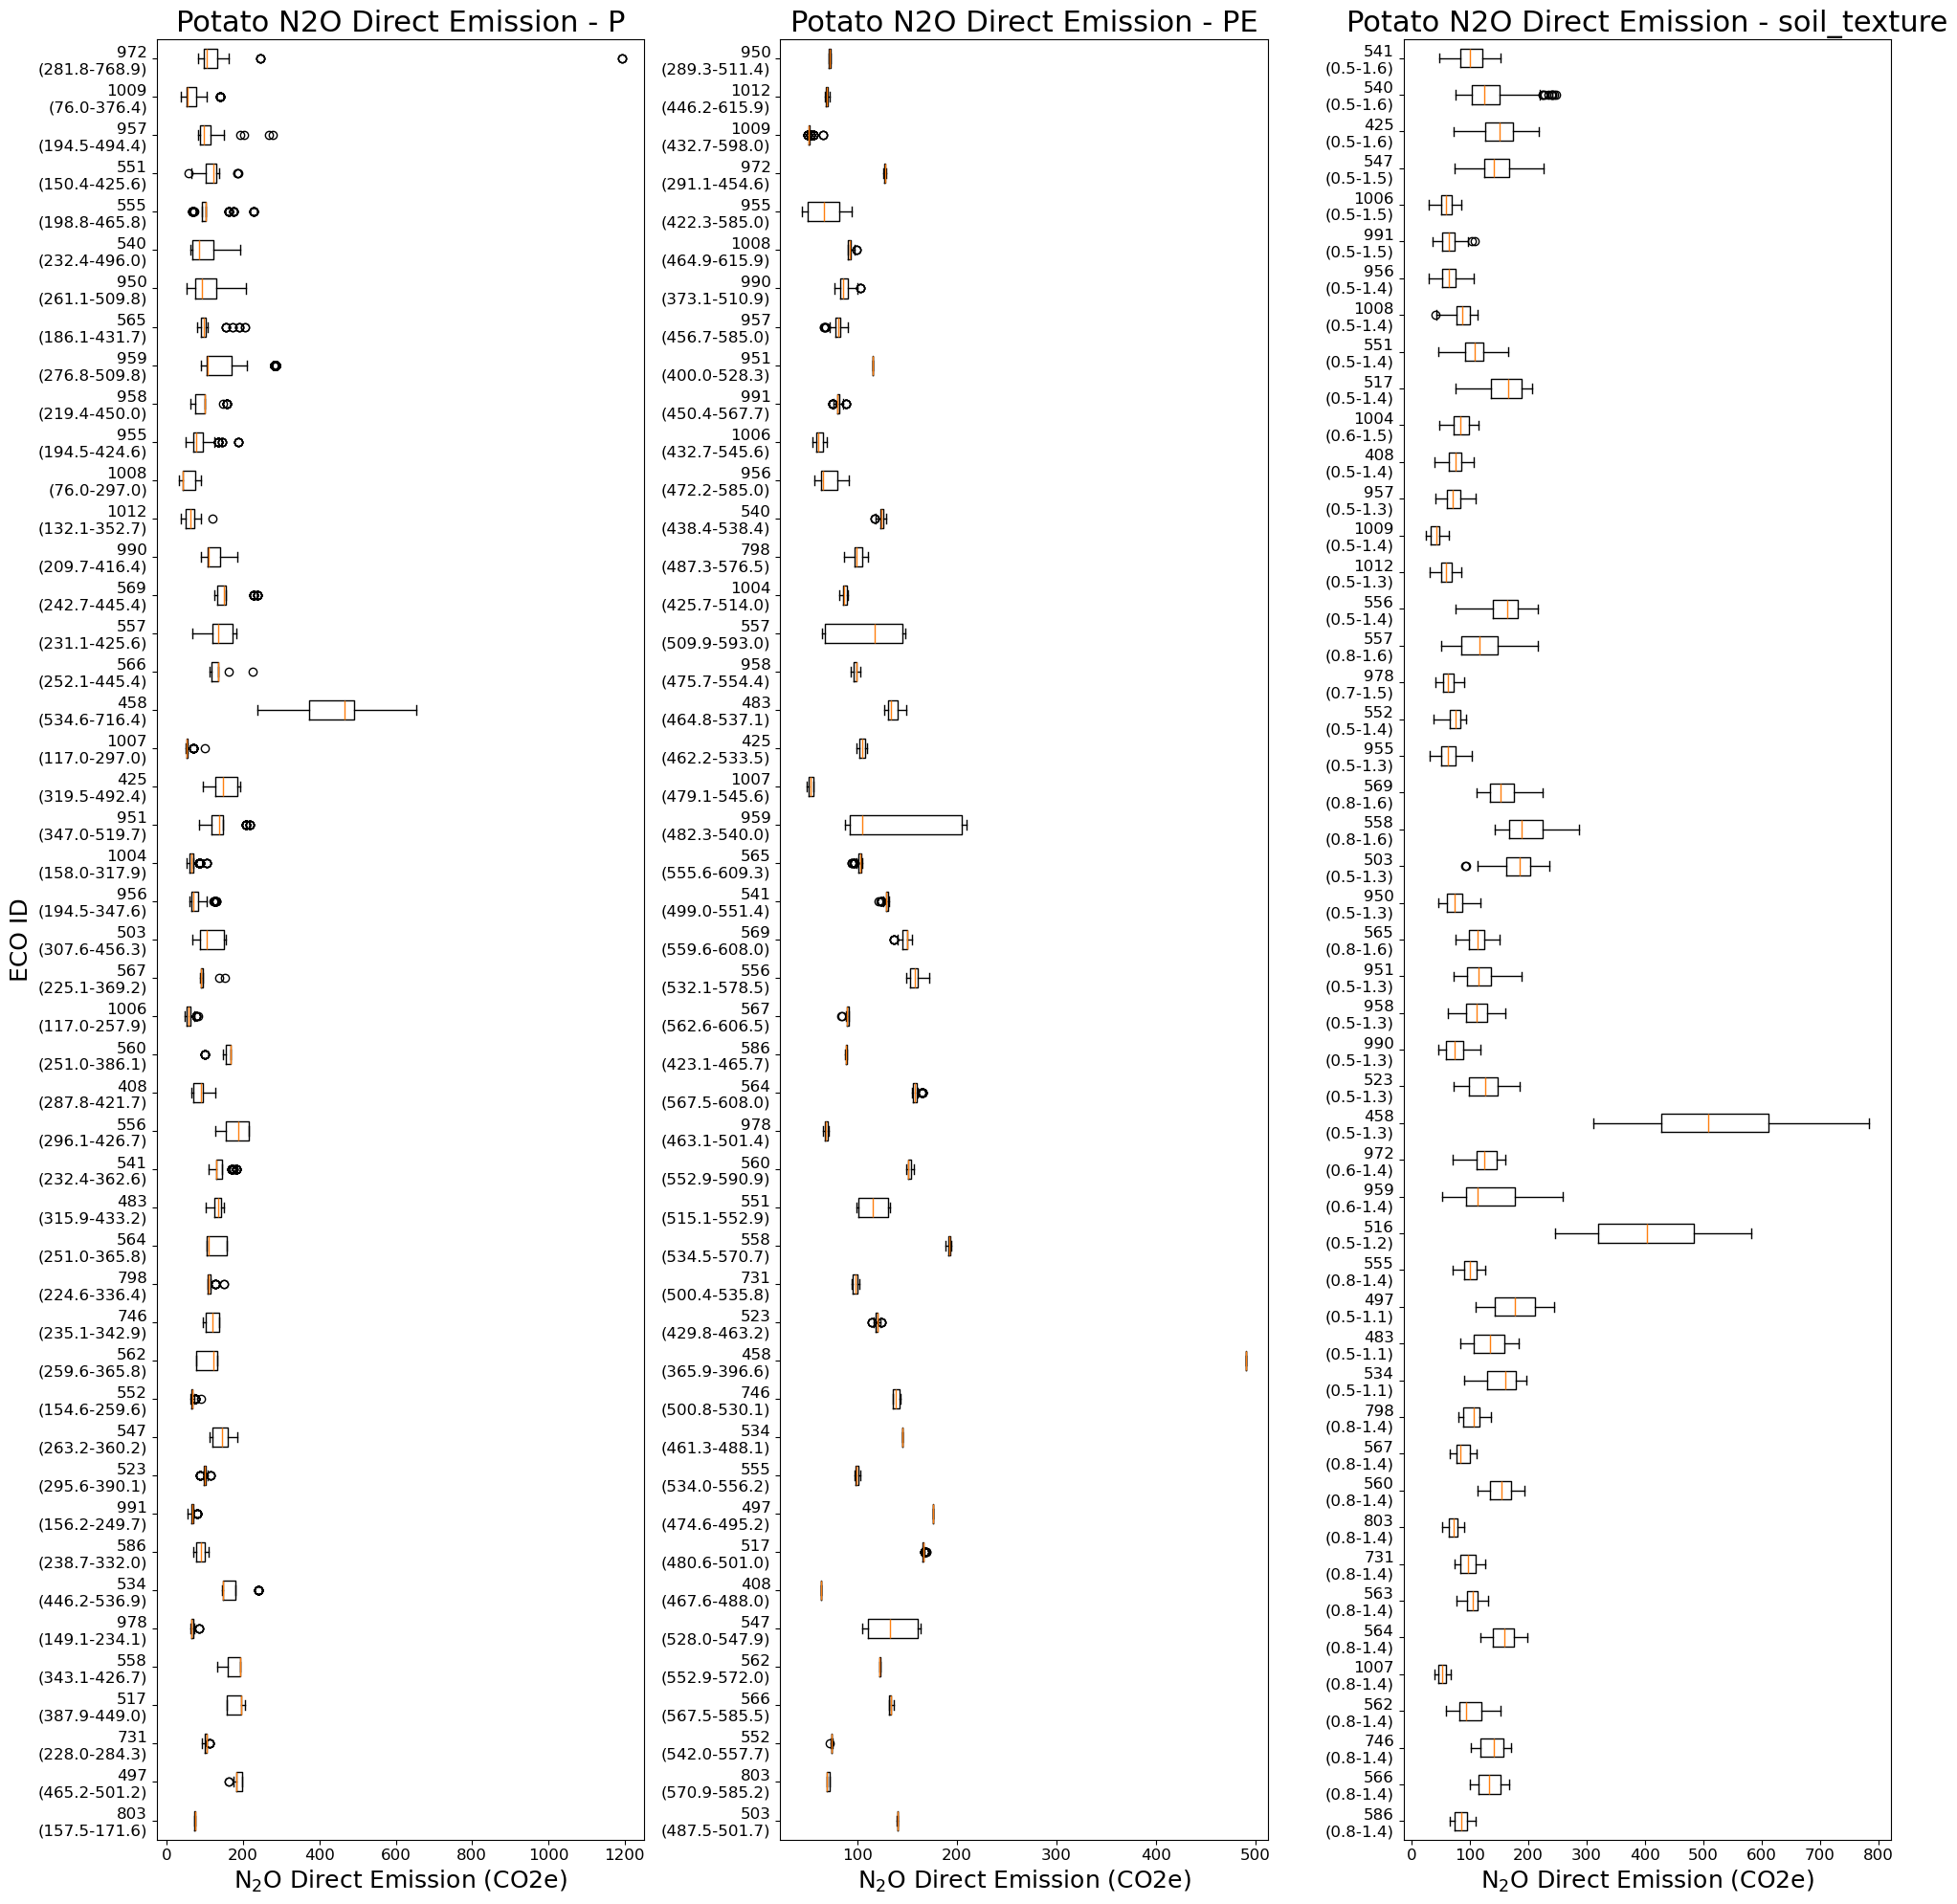

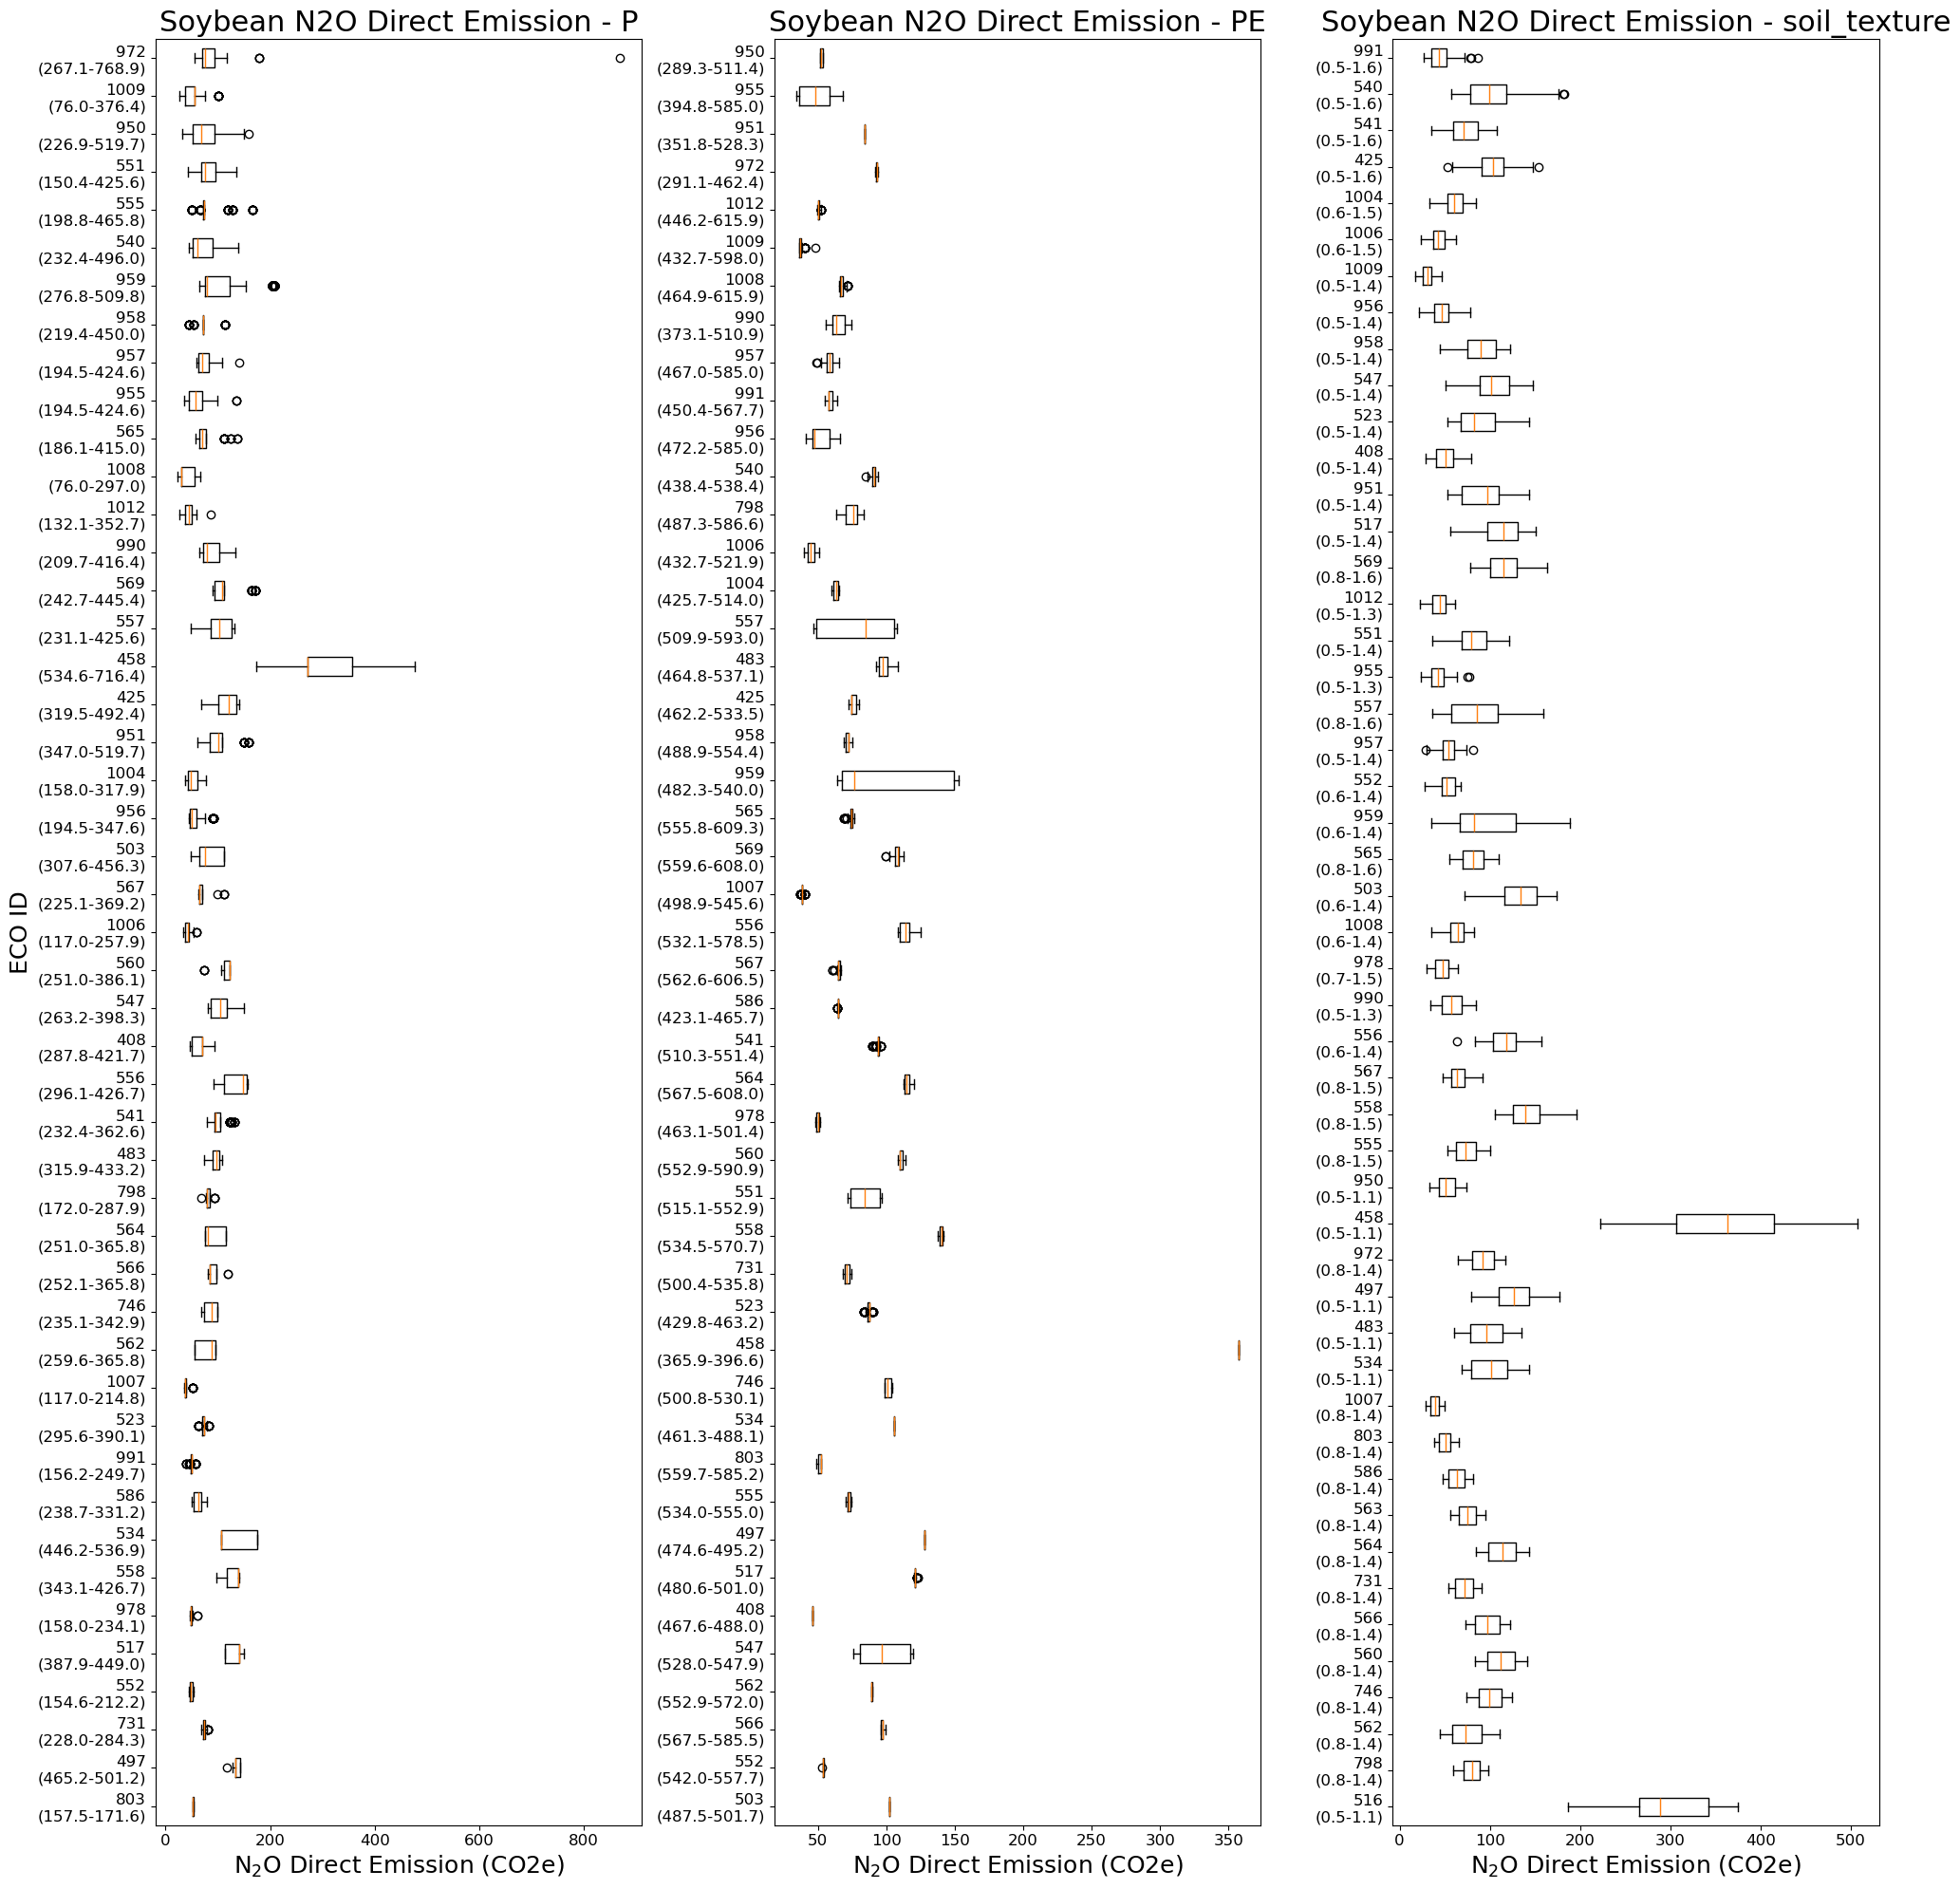

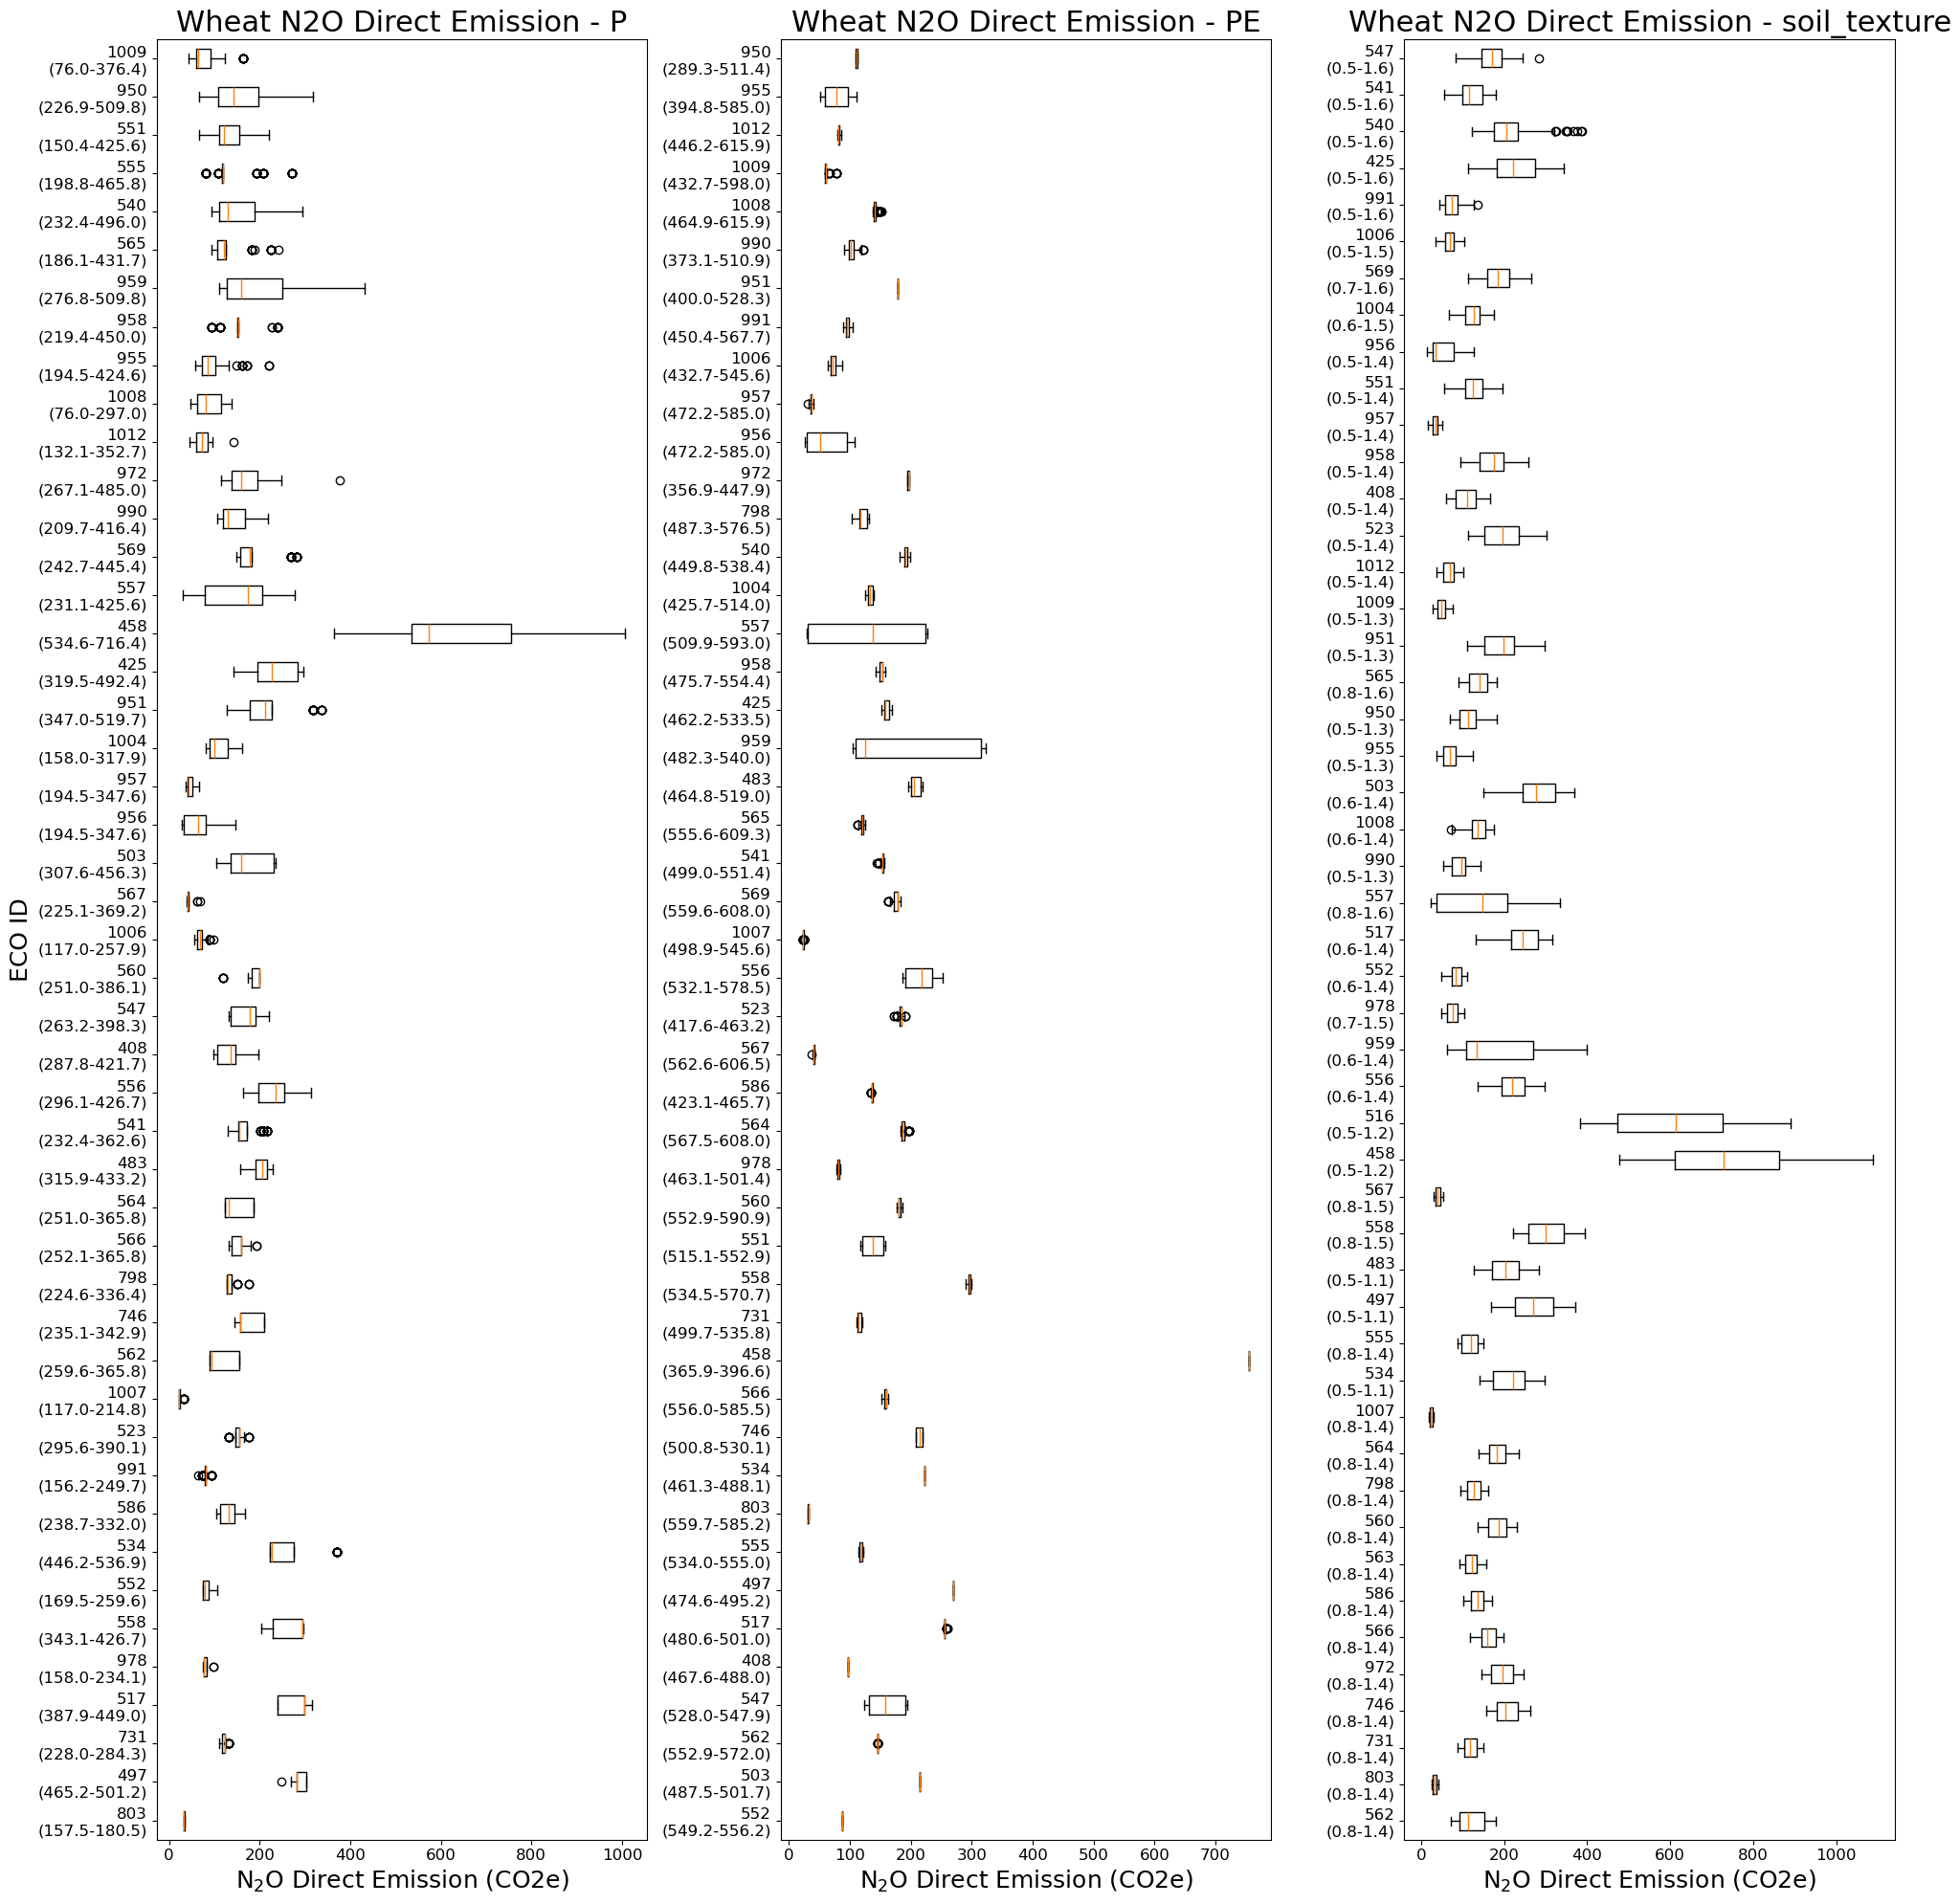

In [9]:
df = pd.read_csv('../../data/preprocessed/hypothetical_farm_data.csv')  
variables = ['P', 'PE', 'soil_texture']  
# plot_by_province(df, variables)
# plot_by_crop(df, variables)
plot_by_eco_id(df, variables)